# <Center> Movies Recommendation System Using Python</Center>

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Import Required libraries</a></li>
        <li><a href="#ref2">Acquiring the Data</a></li>
        <li><a href="#ref3">Preprocessing</a></li>
        <li><a href="#ref4">Visualization</a></li>
        <li><a href="#ref5">Recommending Similar Movies</a></li>
    </ol>
</div>
<br>
<hr>

<a id="ref1"></a>

# 1. Import Required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

<a id="ref2"></a>

# 2. Acquiring the Data

Now Read each Data file into their dataframes

Dataset: https://www.kaggle.com/grouplens/movielens-latest-full

**Orginal Dataset:**<br>
df_ratings original dataset size is: (27753444, 4)<br>
df_movies original dataset size is: (58098, 3)

For ratings we will take __100000__ rows for our project

In [2]:
df_ratings=pd.read_csv(r"C:\Users\user\Desktop\Movie Project\movielens-latest-full\ratings.csv").head(200000)
df_movies=pd.read_csv(r"C:\Users\user\Desktop\Movie Project\movielens-latest-full\movies.csv")

print("df_ratings dataset size is:",df_ratings.shape)
print("df_movies dataset size is:",df_movies.shape)

df_ratings dataset size is: (200000, 4)
df_movies dataset size is: (58098, 3)


<a id="ref3"></a>
# 3. Preprocessing

### 3.1. Read Ratings.csv data from df_ratings dataframe

Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it.

In [3]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


##### 3.1.1 We won't be needing the timestamp column, so let's drop it to save on memory.

In [4]:
#Drop removes a specified row or column from a dataframe

df_ratings = df_ratings.drop('timestamp', 1)
df_ratings.columns=["UserId","MovieId","Rating"]
df_ratings.head()

,UserId,MovieId,Rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


### 3.2. Now Let's Read movies  dataframe

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_movies.columns=["MovieId","Title","Genres"]
df_movies.head()

,MovieId,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 3.3 Merge both data frames on movieId column and create a new dataframe

In [7]:
df_merge=pd.merge(df_ratings,df_movies, on="MovieId")
print(df_merge.shape)
df_merge.head()

(200000, 5)


,UserId,MovieId,Rating,Title,Genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


##### Let's see the top 10 movies based on highest ratings by users

__NOTE:__ Pandas dataframe.groupby() function is used to split the data into groups based on some criteria.

In [8]:
df_merge.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
From Prada to Nada (2011)                                                         5.0
Intern, The (2000)                                                                5.0
Infamous (2006)                                                                   5.0
Place Promised in Our Early Days, The (Kumo no mukô, yakusoku no basho) (2004)    5.0
Clinical (2017)                                                                   5.0
The Collector (1997)                                                              5.0
Insidious: The Last Key (2018)                                                    5.0
Citizen X (1995)                                                                  5.0
Piglet's Big Movie (2003)                                                         5.0
Love Wrecked (2005)                                                               5.0
Name: Rating, dtype: float64

##### Let's see the top 10 movies which are most rated by users

In [9]:
df_merge.groupby('Title')['Rating'].count().sort_values(ascending=False).head(10)

Title
Forrest Gump (1994)                          702
Shawshank Redemption, The (1994)             671
Pulp Fiction (1994)                          667
Silence of the Lambs, The (1991)             622
Matrix, The (1999)                           588
Star Wars: Episode IV - A New Hope (1977)    584
Jurassic Park (1993)                         532
Schindler's List (1993)                      532
Braveheart (1995)                            512
Toy Story (1995)                             490
Name: Rating, dtype: int64

### 3.4. Create a ratings_data dataframe with average rating and number of ratings(reviews):

In [10]:
ratings_data =pd.DataFrame(df_merge.groupby('Title')['Rating'].mean())
ratings_data['Rating_Counts'] = pd.DataFrame(df_merge.groupby('Title')['Rating'].count())
print(ratings_data.shape)
ratings_data.head()

(12697, 2)


,Rating,Rating_Counts
Title,,
#Horror (2015),1.000000,1
$5 a Day (2008),0.500000,1
'71 (2014),3.500000,2
'Hellboy': The Seeds of Creation (2004),3.750000,2
'Round Midnight (1986),4.166667,3


<a id="ref4"></a>

# 4.Visualization

### 4.1 Lets create a histogram for rating_counts in ratings dataframe

[11647   567   235    88    59    41    22     6    14     5     5     2
     2     1     3]
[  1.          47.73333333  94.46666667 141.2        187.93333333
 234.66666667 281.4        328.13333333 374.86666667 421.6
 468.33333333 515.06666667 561.8        608.53333333 655.26666667
 702.        ]


Text(0, 0.5, 'Number of Rating_Counts(Reviews)')

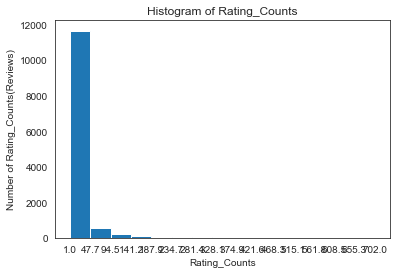

In [11]:
count, bin_edges = np.histogram(ratings_data['Rating_Counts'],15)

print(count)
print(bin_edges)
ratings_data['Rating_Counts'].plot.hist(xticks=bin_edges,figsize=(6,4),bins=15)
                                                                                                             
plt.title('Histogram of Rating_Counts')
plt.xlabel('Rating_Counts') 
plt.ylabel('Number of Rating_Counts(Reviews)')

### 4.2 Lets create a histogram for rating in ratings dataframe

[ 249  259   45  204  127  684  946  820 2166 1296 2609 1906  440  459
  487]
[0.5 0.8 1.1 1.4 1.7 2.  2.3 2.6 2.9 3.2 3.5 3.8 4.1 4.4 4.7 5. ]


Text(0, 0.5, 'Number of Ratings')

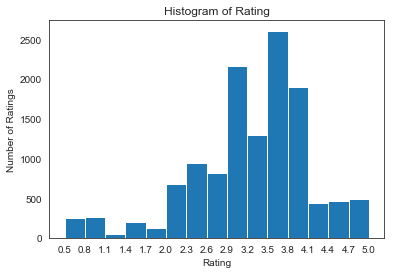

In [12]:
count, bin_edges = np.histogram(ratings_data['Rating'],15)

print(count)
print(bin_edges)
ratings_data['Rating'].plot.hist(xticks=bin_edges,figsize=(6,4),bins=15)                                
                                                          
plt.title('Histogram of Rating')
plt.xlabel('Rating') 
plt.ylabel('Number of Ratings')

### 4.3 Relationship between the Ratings and Rating_Counts

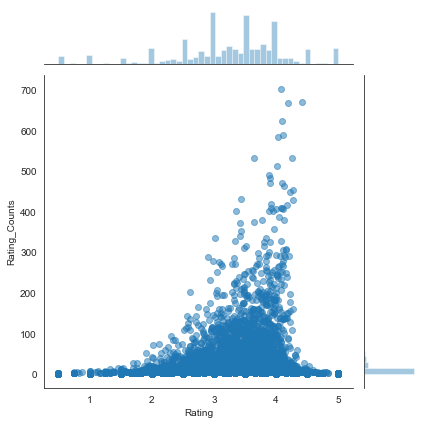

In [13]:
sns.jointplot(x='Rating', y='Rating_Counts', data=ratings_data, alpha=0.5)

<a id="ref5"></a>
# 5. Recommending Similar Movies

### 5.1 Let's create a matrix that has the user ids on one axis and the movie title on another axis. 

Each cell will then consist of the rating the user gave to that movie. The NaN values are due to most people not having seen most of the movies.

In [14]:
Movie_Matrix = df_merge.pivot_table(index='UserId', columns='Title', values='Rating')
Movie_Matrix .head()

Title,#Horror (2015),$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,iMurders (2008),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014),Оно (1990),Сердца трех (1992),チェブラーシカ (2010)
UserId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,3.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2 Lets see top10 movies based on rating_counts in ratings_data dataframe

In [15]:
ratings_data.sort_values('Rating_Counts', ascending=False).head(10)

,Rating,Rating_Counts
Title,,
Forrest Gump (1994),4.084046,702
"Shawshank Redemption, The (1994)",4.413562,671
Pulp Fiction (1994),4.185157,667
"Silence of the Lambs, The (1991)",4.100482,622
"Matrix, The (1999)",4.114796,588
Star Wars: Episode IV - A New Hope (1977),4.033390,584
Jurassic Park (1993),3.647556,532
Schindler's List (1993),4.259398,532
Braveheart (1995),4.019531,512


### 5.3 Let's choose few movies for our system: 
__Forrest Gump__ <br>
__Toy Story__<br>
__Jumanji__

What are the user ratings for those movies?


In [16]:
ForstGump_user_ratings = Movie_Matrix["Forrest Gump (1994)"]
ToyStory_user_ratings =Movie_Matrix["Toy Story (1995)"]
FghtClb_user_ratings = Movie_Matrix["Fight Club (1999)"]

print("ForstGump_user_ratings:", ForstGump_user_ratings.head()) 
print("-------------------------")
print("ToyStory_user_ratings:", ToyStory_user_ratings.head()) 
print("--------------------------")
print("FghtClb_user_ratings:", FghtClb_user_ratings.head())

ForstGump_user_ratings: UserId
1    NaN
2    NaN
3    NaN
4    3.5
5    NaN
Name: Forrest Gump (1994), dtype: float64
-------------------------
ToyStory_user_ratings: UserId
1    NaN
2    NaN
3    NaN
4    4.0
5    NaN
Name: Toy Story (1995), dtype: float64
--------------------------
FghtClb_user_ratings: UserId
1    NaN
2    NaN
3    NaN
4    5.0
5    4.5
Name: Fight Club (1999), dtype: float64


### 5.4 Correlation of every other movie to that specific user behaviour on the Forrest Gump, Toy Story, Jumanji movies

In [17]:
Similar_to_ForstGump = Movie_Matrix.corrwith(ForstGump_user_ratings)
Similar_to_ToyStory = Movie_Matrix.corrwith(ToyStory_user_ratings).dropna()
Similar_to_FghtClb = Movie_Matrix.corrwith(FghtClb_user_ratings).dropna()

print("Similar_to_ForstGump:",Similar_to_ForstGump.head())
print("----------------------------------")
print("Similar_to_ToyStory:",Similar_to_ToyStory.head())
print("----------------------------------")
print("Similar_to_FghtClb:",Similar_to_FghtClb.head())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Similar_to_ForstGump: Title
#Horror (2015)                             NaN
$5 a Day (2008)                            NaN
'71 (2014)                                 1.0
'Hellboy': The Seeds of Creation (2004)    NaN
'Round Midnight (1986)                     0.5
dtype: float64
----------------------------------
Similar_to_ToyStory: Title
'Round Midnight (1986)         1.000000
'Salem's Lot (2004)           -1.000000
'Til There Was You (1997)      0.500000
'burbs, The (1989)            -0.124769
(500) Days of Summer (2009)    0.173780
dtype: float64
----------------------------------
Similar_to_FghtClb: Title
'71 (2014)                     1.000000
'Salem's Lot (2004)            1.000000
'Til There Was You (1997)      0.928571
'burbs, The (1989)             0.541208
(500) Days of Summer (2009)    0.055520
dtype: float64


### 5.5 Create new dataframes for all 3 movies and add a column "Correlation"

Result will be a Perfectly correlated movies with Forest Gump/ ToyStory / Fight Club

In [18]:
corr_ForstGump = pd.DataFrame(Similar_to_ForstGump, columns=['Correlation'])
corr_ForstGump.dropna(inplace=True)
corr_ForstGump.sort_values('Correlation', ascending=False).head(10)

,Correlation
Title,
Dark Skies (2013),1.0
Tom & Viv (1994),1.0
Musa the Warrior (Musa) (2001),1.0
"Tournament, The (2009)",1.0
Cul-de-sac (1966),1.0
Anna (2013),1.0
Town & Country (2001),1.0
"Culture High, The (2014)",1.0
Mr. Pip (2012),1.0


In [19]:
corr_ToyStory = pd.DataFrame(Similar_to_ToyStory, columns=['Correlation'])
corr_ToyStory.dropna(inplace=True)
corr_ToyStory.sort_values('Correlation', ascending=False).head(10)

,Correlation
Title,
'Round Midnight (1986),1.0
Eagle vs Shark (2007),1.0
National Velvet (1944),1.0
Naqoyqatsi (2002),1.0
My Winnipeg (2007),1.0
Things Behind the Sun (2001),1.0
Drinking Buddies (2013),1.0
Music From Another Room (1998),1.0
Musa the Warrior (Musa) (2001),1.0


In [20]:
corr_FghtClb = pd.DataFrame(Similar_to_FghtClb, columns=['Correlation'])
corr_FghtClb.dropna(inplace=True)
corr_FghtClb.sort_values('Correlation', ascending=False).head(10)

,Correlation
Title,
Rivers and Tides (2001),1.0
Stander (2003),1.0
"Guest, The (2014)",1.0
Morons From Outer Space (1985),1.0
DOA: Dead or Alive (2006),1.0
Daisies (Sedmikrasky) (1966),1.0
Mr. Pip (2012),1.0
Step Up 2 the Streets (2008),1.0
Steamboy (Suchîmubôi) (2004),1.0


### 5.6 Set a threshold for the rating_counts and filter out movies that have greater than a certain number of reviews

join the 'ratings_count' column to our dataframe and filter out movies that have greater than 100 reviews

In [21]:
corr_ForstGump = corr_ForstGump.join(ratings_data['Rating_Counts'], how='left',lsuffix='_left', rsuffix='_right')
corr_ForstGump[corr_ForstGump['Rating_Counts']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,Rating_Counts
Title,,
Forrest Gump (1994),1.000000,702
The Martian (2015),0.533968,112
Mr. Holland's Opus (1995),0.528427,160
Ratatouille (2007),0.482847,120
Saving Private Ryan (1998),0.461023,407
Bruce Almighty (2003),0.459917,120
Slumdog Millionaire (2008),0.456704,142
"Green Mile, The (1999)",0.455430,244
Braveheart (1995),0.451088,512


In [22]:
corr_ToyStory = corr_ToyStory.join(ratings_data['Rating_Counts'], how='left', lsuffix='_left', rsuffix='_right')
corr_ToyStory[corr_ToyStory['Rating_Counts']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,Rating_Counts
Title,,
Toy Story (1995),1.000000,490
Toy Story 2 (1999),0.741434,196
Spider-Man (2002),0.609288,214
"Bug's Life, A (1998)",0.585254,201
Finding Nemo (2003),0.581662,242
Spider-Man 2 (2004),0.570292,137
Jaws (1975),0.566414,192
Shrek 2 (2004),0.541971,154
Antz (1998),0.540299,109


In [23]:
corr_FghtClb = corr_FghtClb.join(ratings_data['Rating_Counts'], how='left', lsuffix='_left', rsuffix='_right')
corr_FghtClb[corr_FghtClb['Rating_Counts']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,Rating_Counts
Title,,
Fight Club (1999),1.000000,449
Deep Impact (1998),0.475330,107
Blade (1998),0.470885,103
"Maltese Falcon, The (1941)",0.470433,109
Alien: Resurrection (1997),0.446207,103
"Three Musketeers, The (1993)",0.440427,122
From Dusk Till Dawn (1996),0.439544,114
Lethal Weapon 2 (1989),0.421573,124
Boogie Nights (1997),0.419954,125


**Conclusion:**

This is the basic recommendation system which is suggesting movies that are most similar to a particular movie.
